#  **SALES ANALYSIS**

The main goal of this notebook, is to answer real world business questions from data.
There are 12 csv files, of the sales in the year 2019 for a certain company.
The files are splitted by months.

Every file contains the Order Id of the sale, the Product description, the quantity ordered of each product, the Price, the Order Data, and the Address where the Order was made.


In [2]:
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import statsmodels.api as sm
import itertools
import warnings
import numpy as np
from itertools import product
from datetime import datetime
from scipy import stats
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

In [3]:
path = "C:\\Users\\Asus\\Desktop\\Power BI\\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]  # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)
all_months_data = pd.DataFrame(all_months_data)

In [4]:
#Observing Dataframe
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Identifying data format and errors**

In [5]:
all_months_data.info()
all_months_data.describe()
print()
print(f'Dataframe shape is: {all_months_data.shape}')
all_months_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB

Dataframe shape is: (186850, 6)


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

**there are 545 rows with nan values, and some numerical values with object type of data**

In [6]:
print(all_months_data[all_months_data.isnull().any(axis=1)].head(10))

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN
1571      NaN     NaN              NaN        NaN        NaN              NaN
1992      NaN     NaN              NaN        NaN        NaN              NaN
2265      NaN     NaN              NaN        NaN        NaN              NaN
2798      NaN     NaN              NaN        NaN        NaN              NaN
3024      NaN     NaN              NaN        NaN        NaN              NaN


**Appartently the rows with NAN values don´t have any info, so let´s get rid of them**

In [7]:
#Deleting NaN rows
all_months_data.dropna(inplace=True)

In [8]:
#Deleting All the rows that not contain information
all_months_data = all_months_data[all_months_data['Product'] != 'Product']

**let´s convert data types from object to numerical**

In [9]:
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])
all_months_data['Order ID'] = pd.to_numeric(all_months_data['Order ID'])
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) 

**Lets get more info from de data**

In [10]:
#Creating a new column where the total of the sale is displayed
all_months_data['Purchase_Total'] = all_months_data['Price Each'] * all_months_data['Quantity Ordered']

**How many times the Products were sold??**

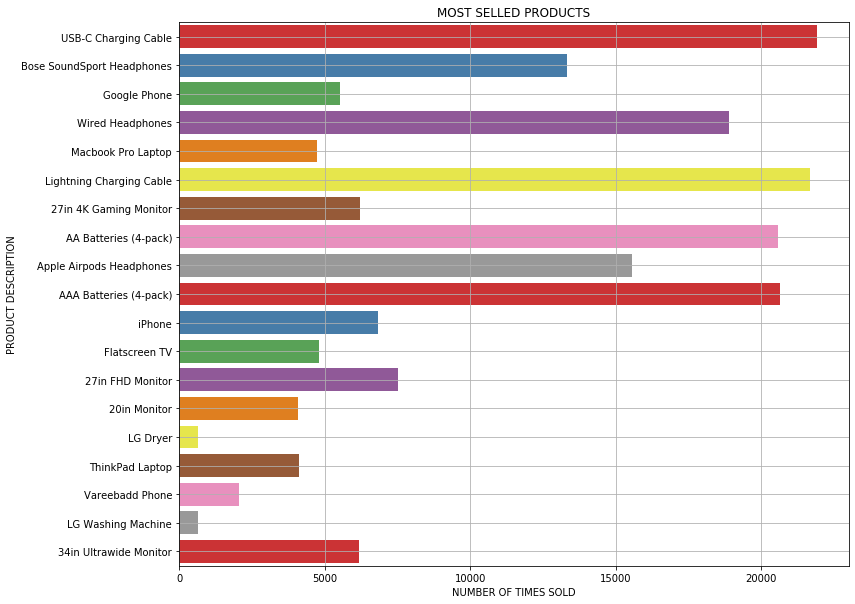

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(data=all_months_data,y='Product',palette='Set1')
plt.grid()
plt.title('MOST SELLED PRODUCTS')
plt.ylabel('PRODUCT DESCRIPTION')
plt.xlabel('NUMBER OF TIMES SOLD')
plt.show()

**¿Why the products sell more or less?**

<Figure size 864x720 with 0 Axes>

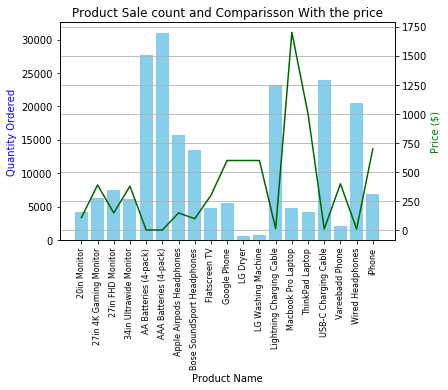

In [12]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = all_months_data.groupby('Product').mean()['Price Each']

plt.figure(figsize=(12,10))
fig, ax1 = plt.subplots()
#The line below is for the line to be on the same plot
ax2 = ax1.twinx()
ax1.bar(prices.index, quantity_ordered, color='skyblue')
ax2.plot(prices.index, prices, color='darkgreen')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax2.set_ylabel('Price ($)', color='green')
ax1.set_xticklabels(prices.index, rotation='vertical', size=8)

plt.title('Product Sale count and Comparisson With the price')
plt.grid()
fig.show()

Note: **Cheaper products like batteries are very likely to be sold, and necessary products like charging cables, despite ot their price, customers need to buy them. Expensive products like laptops, washing machines or screens are products that customers don´t need to buy them frequently, and also no many customers can afford them.**

In [13]:
#Let´s convert the datetime column into datetime format
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])
all_months_data.rename(columns={'Order Date':'Order_date'}, inplace=True)

In [14]:
#Creating new columns based on the time info
all_months_data['Month'] = all_months_data.Order_date.dt.month
all_months_data['Day'] = all_months_data.Order_date.dt.day
all_months_data['Hour'] = all_months_data.Order_date.dt.hour

In [15]:
#Grouping by Sales by Month
month = all_months_data.groupby(by=["Month"]).sum()
month = month.drop(columns=['Price Each','Day','Hour','Order ID','Quantity Ordered'])

In [16]:
#Grouping Sales by Day
day = all_months_data.groupby(by=["Day"]).sum()
day = day.drop(columns=['Price Each','Month','Hour','Order ID','Quantity Ordered'])

**¿Which is the month of the year with more sales?**

<Figure size 864x720 with 0 Axes>

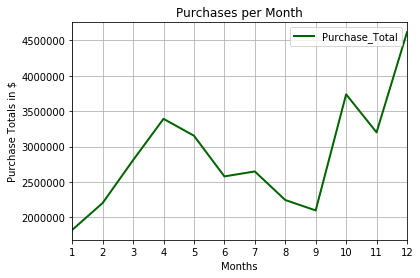

In [17]:
plt.figure(figsize=(12,10))
month.plot(color='darkgreen',linewidth=2.0)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Purchase Totals in $')
plt.xticks(month.index)
plt.title('Purchases per Month')
plt.show()

**¿Which are the days of the months with more sales?**

<Figure size 1080x720 with 0 Axes>

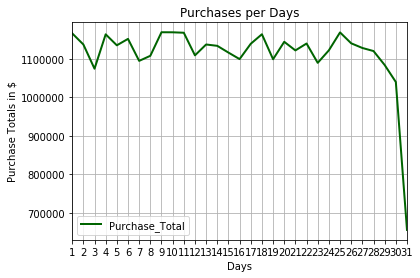

In [18]:
plt.figure(figsize=(15,10))
day.plot(color='darkgreen',linewidth=2.0)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Purchase Totals in $')
plt.xticks(day.index)
plt.title('Purchases per Days')
plt.show()

**We want to know which are the hours where customers are more likely to buy our products, and which hours the customers are not buying stuff**

In [19]:
#Grouping Sales by Day
hour = all_months_data.groupby(by=["Hour"]).sum()
hour = hour.drop(columns=['Price Each','Month','Day','Order ID','Quantity Ordered'])

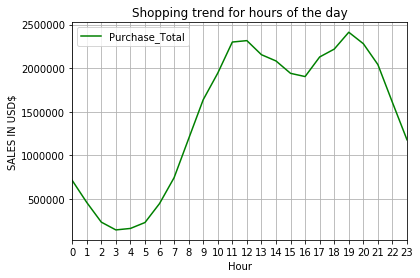

In [20]:
#plot for  distribution on sales based on hours
hour.plot(color='green')
plt.xticks(hour.index)
plt.grid()
plt.ylabel('SALES IN USD$')
plt.title('Shopping trend for hours of the day')
plt.show()

In [21]:
#Get the Satate and the City
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_date,Purchase Address,Purchase_Total,Month,Day,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,22,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,9,Los Angeles (CA)


**WE WANT TO KNOW THE PURCHASE TOTAL PER CITY, WHICH WHAS THE CITY WITH MORE PURCHASES AND THE CITY WITH THE LESS**

In [22]:
#Grouping Sales by Day
city = all_months_data.groupby(by=["City"]).sum()
city = city.drop(columns=['Price Each','Month','Hour','Order ID','Quantity Ordered'])

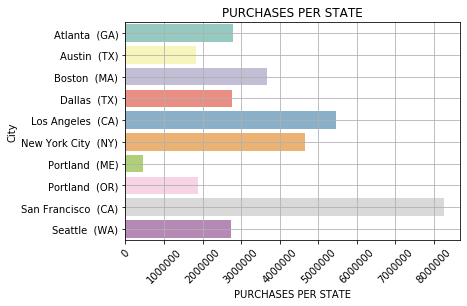

In [23]:
sns.barplot(data=city, y=city.index, x=city.Purchase_Total, palette='Set3')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('PURCHASES PER STATE')
plt.title('PURCHASES PER STATE')
plt.show()


**Distribution of product sales for each state :)**

In [24]:
#Lets observe how many products were sold by state
city_product = all_months_data[['City','Product']]

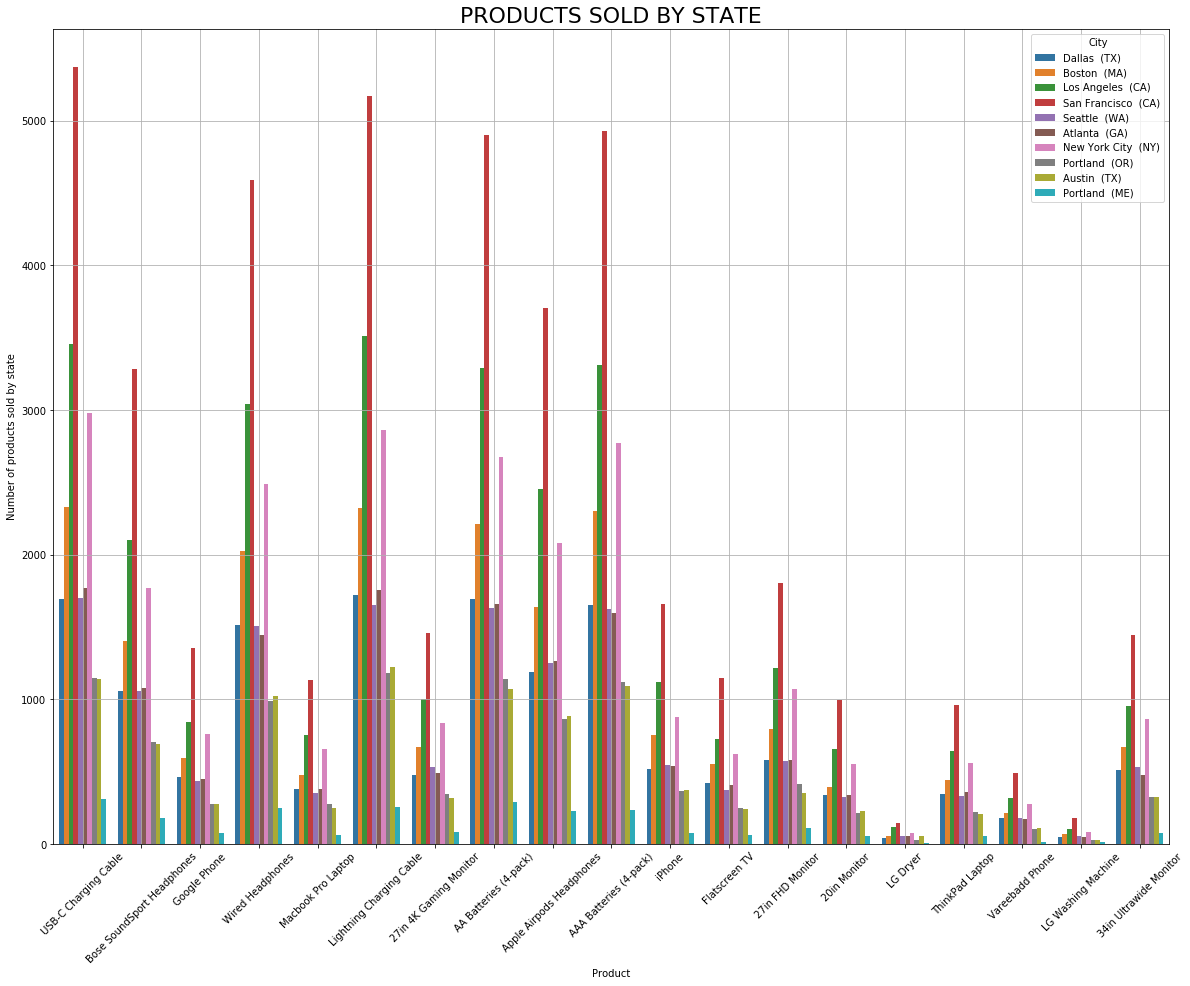

In [25]:
plt.figure(figsize=(20,15))
sns.countplot(data=city_product,x='Product',hue='City')
plt.ylabel('Number of products sold by state')
plt.title('PRODUCTS SOLD BY STATE', size=22)
plt.xticks(rotation=45)
plt.grid()
plt.show()

**¿Which are items are sold together?**

In [26]:
orders = all_months_data
orders['Order ID'] = orders['Order ID'].astype('str')
#The line of code below is to sort the dataset based on the "Order ID" Column 
orders = orders[orders['Order ID'].duplicated(keep=False)]
#The line below is to put both values on the same column, separated by a comma " , "
orders['Grouped'] = orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
product_order = orders[['Order ID', 'Grouped']].drop_duplicates()

In [27]:
count = Counter()

for row in product_order['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**!Lets Plot it!**

In [28]:
#Let`s plot the first 50 products that are sold together
two_items = pd.DataFrame(count.most_common(10),
                             columns=['Products', 'Count'])

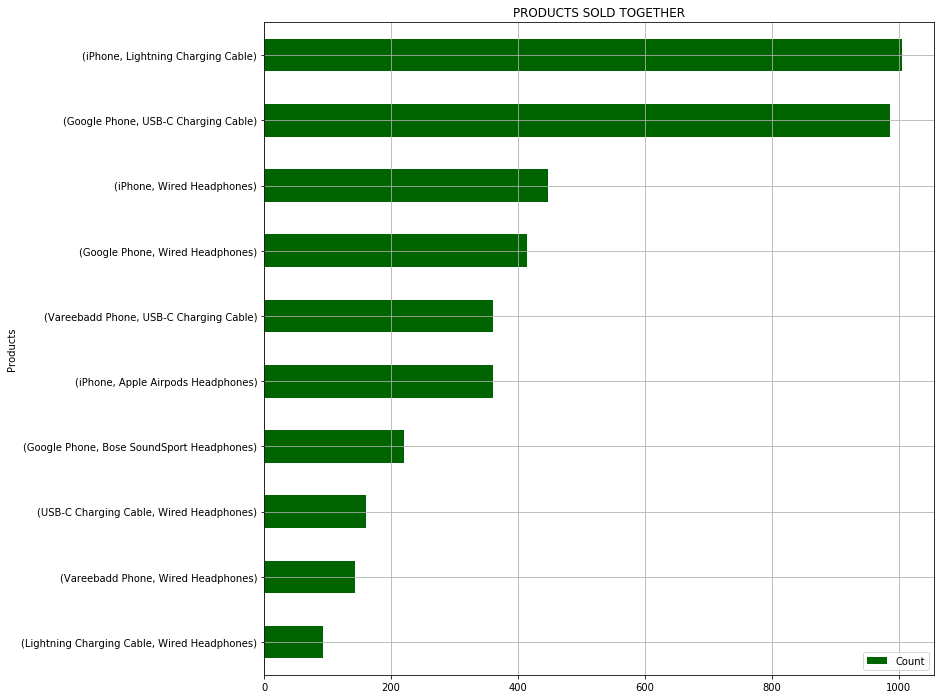

In [29]:

#The goup of 10 articles that are sold together
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
two_items.sort_values(by='Count').plot.barh(x='Products',
                      y='Count',
                      ax=ax,
                      color="darkgreen")

ax.set_title('PRODUCTS SOLD TOGETHER')
plt.grid()
plt.show()

**Let´s see the combinations of products for each state**

In [30]:
city_and_products = orders[['Order ID', 'Grouped','City']].drop_duplicates()
city_and_products['City'].unique()

array(['Los Angeles  (CA)', 'Boston  (MA)', 'San Francisco  (CA)',
       'New York City  (NY)', 'Seattle  (WA)', 'Austin  (TX)',
       'Dallas  (TX)', 'Portland  (OR)', 'Atlanta  (GA)',
       'Portland  (ME)'], dtype=object)

In [31]:
los_angeles = city_and_products[city_and_products['City']== 'Los Angeles  (CA)']
for rows in los_angeles['Grouped']:
    row_list_angeles = rows.split(',')
    count.update(Counter(combinations(row_list_angeles, 2)))

print('LIST OF PRODUCTS SOLD TOGETHER IN LOS ANGELES')
print('')
for key,value in count.most_common(10):
    print(key, value)

LIST OF PRODUCTS SOLD TOGETHER IN LOS ANGELES

('iPhone', 'Lightning Charging Cable') 1154
('Google Phone', 'USB-C Charging Cable') 1129
('iPhone', 'Wired Headphones') 504
('Google Phone', 'Wired Headphones') 483
('iPhone', 'Apple Airpods Headphones') 421
('Vareebadd Phone', 'USB-C Charging Cable') 399
('Google Phone', 'Bose SoundSport Headphones') 246
('USB-C Charging Cable', 'Wired Headphones') 184
('Vareebadd Phone', 'Wired Headphones') 165
('Lightning Charging Cable', 'Wired Headphones') 103


**note:** This time i only did the list for los angeles, but you can do it for any state that you want

**¿Can we observe the average sales divided into several segments such as days, fourth years, among others?**

In [32]:
orders = orders.sort_values(by='Order_date')
sales = orders[['Order_date', 'Purchase_Total']]

In [33]:
# Resampling to daily frequency
sales.index = sales.Order_date
sales = sales.drop(columns=['Order_date'])
df = sales.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

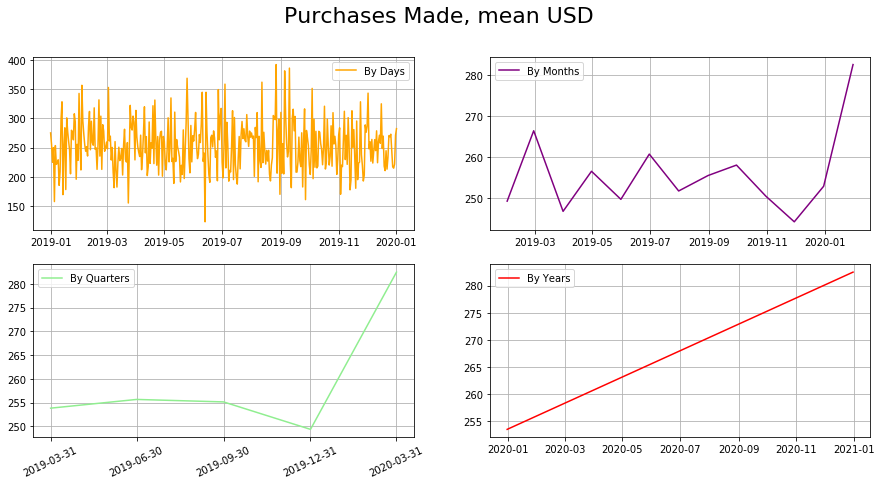

In [35]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Purchases Made, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Purchase_Total, '-', label='By Days',color='orange')
plt.grid()
plt.legend()


plt.subplot(222)
plt.plot(df_month.Purchase_Total, '-', label='By Months',color='purple')
plt.grid()
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Purchase_Total, '-', label='By Quarters',color='lightgreen')
plt.xticks(df_Q.index, rotation=25)
plt.grid()
plt.legend()

plt.subplot(224)
plt.plot(df_year.Purchase_Total, '-', label='By Years',color='red')
plt.grid()
plt.legend()


# plt.tight_layout()
plt.show()